<a href="https://colab.research.google.com/github/acate/speech_recognition/blob/main/whisper_mock_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【Master】 whisper-mock
Whisper is a general-purpose speech recognition model open-sourced by OpenAI.

## 📖 How to use
1. Run "Setting up".
2. Open the folder icon from the left sidebar.
3. Upload audio files into the `content`.
4. Input the audio file name into `fileName`.
5. Select output language.
5. Run "Transcription".

In [1]:
#@title Setting up
# Install packages
!pip install git+https://github.com/openai/whisper.git

import os

# Add folders
checkContentFolder = os.path.exists("content")
checkDownLoadFolder = os.path.exists("download")
if not checkContentFolder:
  os.mkdir("content")
if not checkDownLoadFolder:
  os.mkdir("download")

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-pc5csveg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-pc5csveg
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-m

In [7]:
#@title Transcription
import whisper

fileName = "extra_0b.wav"#@param {type:"string"}
lang = "en"#@param ["en", "ja"]
model = whisper.load_model("base")

# Load audio
audio = whisper.load_audio(f"/content/{fileName}")
audio = whisper.pad_or_trim(audio)

mel = whisper.log_mel_spectrogram(audio).to(model.device)

# Output the recognized text
options = whisper.DecodingOptions(language=lang, without_timestamps=True)
result = whisper.decode(model, mel, options)
print(result.text)

# Write into a text file
with open(f"download/{fileName}.txt", "w") as f:
  f.write(f"▼ Transcription of {fileName}\n")
  f.write(result.text)

Let the merchant gave the boy permission to build the display.


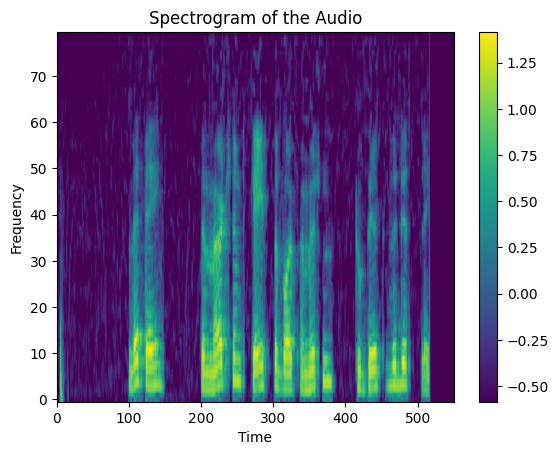

In [14]:
import matplotlib.pyplot as plt

# Obtain the log mel spectrogram of the audio
mel_spectrogram = whisper.log_mel_spectrogram(audio)

# Plot the spectrogram
plt.imshow(mel_spectrogram, origin="lower", aspect="auto")
plt.colorbar()
plt.xlabel("Time")
plt.ylabel("Frequency")


# Set the x-axis limits using the calculated values
# CHANGE AS NEEDED, BY HAND
plt.xlim(0, 550)

plt.title("Spectrogram of the Audio")
plt.show()

In [5]:
#@title Download a transcription file
from google.colab import files
!zip -r download.zip download
files.download("download.zip")

  adding: download/ (stored 0%)
  adding: download/extra_0b.wav.txt (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>